# Naive Bayes

In [1]:
import csv
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
def carregar(arquivo, delimiter=';', quoteChar='"', ignoraLinha1=True, ignoraColuna1=False):
    data = []
    with open(arquivo) as csv_file:
        #reader = csv.reader(file, quoting=csv.QUOTE_NONNUMERIC)
        csv_reader = csv.reader(csv_file, delimiter=delimiter, quoting=csv.QUOTE_NONNUMERIC)
        if ignoraLinha1:
            count = 0
        else:
            count = 1
        for row in csv_reader:
            if count != 0 :
                if row:
                    if ignoraColuna1:
                        data.append(tuple(row[1:]))
                    else:
                        data.append(tuple(row))
            count += 1
    return(data)

In [3]:
def treinamento(data):
    total = len(data)
    classes = list(set([x[-1] for x in data]))
    combdata = {}
    pdata = {}
    for row in data:
        classe = (row[-1])
        if classe in combdata:
            combdata[classe] += 1
        else:
            combdata[classe] = 1    
        for i, d in enumerate(row[:-1]):
            # variavel continua
            if (str(d).replace('.','',1).isdigit() or type(d) == float or type(d) == int):
                ind = 'i'+str(i)
                if ind in combdata:
                    combdata[ind].append(float(d))
                else:
                    combdata[ind] = [ float(d) ]
                key = (ind,classe)    
                if key in combdata:
                    combdata[key].append(float(d))
                else:
                    combdata[key] = [float(d)]
            # variavel nominal
            else:
                if d in combdata:
                    combdata[d] += 1
                else:
                    combdata[d] = 1
                key = (d,classe)
                if key in combdata:
                    combdata[key] += 1
                else:
                    combdata[key] = 1
    # calculando probabilidades
    probdata = {}
    for c in combdata:
        if type(c) == tuple:
            if type(combdata[c]) != list:
                probdata[c] = combdata[c] / combdata[c[1]]
            else:
                media =  sum(combdata[c])/len(combdata[c])
                desvio = (sum([(x-media)**2 for x in combdata[c]])/(len(combdata[c])-1))**0.5
                probdata[c] = {
                    'media' : media,
                    'desvio' : desvio
                }
        else:
            if type(combdata[c]) != list:
                probdata[c] = combdata[c] / total
            else:
                media =  sum(combdata[c])/len(combdata[c])
                desvio = (sum([(x-media)**2 for x in combdata[c]])/(len(combdata[c])-1))**0.5
                probdata[c] = {
                    'media' : media,
                    'desvio' : desvio
                }
    probdata['classes'] = classes
    return(probdata)

In [4]:
def g(x, media, desvio):
    p1 = 1 / ( (2*3.141592653589793)**0.5 * desvio  )
    p2 = 2.718281828459045 ** (-((x - media) ** 2) / (2 * desvio ** 2))
    return p1 * p2

# testando função g
print(g(83, 73.00, 6.16)) # 0.017
print(g(83, 74.60, 7.89)) # 0.029
print(g(83, 73.57, 6.57)) # 0.022

0.017340835222313836
0.028688396603888434
0.021676800985283348


In [5]:
def verificar(probdata, tupla, debug=False):
    probClasse = {}
    valClasse = 0
    maxClasse = ''
    for classe in probdata['classes']:
        numerador = 1
        denominador = 1
        #i=0
        for i, v in enumerate(tupla):
        #for v in tupla:
            #if type(v) == str:
            #if not str(v).replace('.','',1).isdigit():
            # atributo nominal
            if (not (str(v).replace('.','',1).isdigit() or type(v) == float or type(v) == int)):
                key = (v, classe)
                if key in probdata:
                    numerador = numerador * probdata[key]
                else:
                    numerador = numerador * 0.001
                #if v in probdata:
                denominador = denominador * probdata[v]
                #else:
                #denominador = denominador * 0.001
            # atributo continuo
            else:
                v = float(v)
                key1 = ('i'+str(i),classe)
                key2 = 'i'+str(i)
                #i += 1
                if key1 in probdata:
                    numerador = numerador * g(v,probdata[key1]['media'],probdata[key1]['desvio'])
                #else:
                #    numerador = numerador * 0.001
                denominador = denominador * g(v,probdata[key2]['media'],probdata[key2]['desvio'])
        numerador = numerador * probdata[classe]
        probClasse[classe] = numerador / denominador
        if debug:
            print(classe,probClasse[classe])
        if probClasse[classe] > valClasse:
            valClasse = probClasse[classe]
            maxClasse = classe
    return(maxClasse)

In [117]:
class Classificador:
    dados = []
    modelo = {}
    
    def carregar(self, arquivo, delimiter=';', quoteChar='"', ignoraLinha1=True, ignoraColuna1=False):
        self.dados = []
        with open(arquivo) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=delimiter, quoting=csv.QUOTE_NONNUMERIC)
            if ignoraLinha1:
                next(csv_reader)                  
            for row in csv_reader:
                if ignoraColuna1:
                    self.dados.append(tuple(row[1:]))
                else:
                    self.dados.append(tuple(row))
    
    def treinar(self):
        total = len(self.dados)
        classes = list(set([x[-1] for x in self.dados]))
        combdata = {}
        pdata = {}
        for row in self.dados:
            classe = (row[-1])
            if classe in combdata:
                combdata[classe] += 1
            else:
                combdata[classe] = 1    
            for i, d in enumerate(row[:-1]):
                # variavel continua
                if (str(d).replace('.','',1).isdigit() or type(d) == float or type(d) == int):
                    ind = 'i'+str(i)
                    if ind in combdata:
                        combdata[ind].append(float(d))
                    else:
                        combdata[ind] = [ float(d) ]
                    key = (ind,classe)    
                    if key in combdata:
                        combdata[key].append(float(d))
                    else:
                        combdata[key] = [float(d)]
                # variavel nominal
                else:
                    if d in combdata:
                        combdata[d] += 1
                    else:
                        combdata[d] = 1
                    key = (d,classe)
                    if key in combdata:
                        combdata[key] += 1
                    else:
                        combdata[key] = 1
        # calculando probabilidades
        self.modelo = {}
        for c in combdata:
            if type(c) == tuple:
                if type(combdata[c]) != list:
                    self.modelo[c] = combdata[c] / combdata[c[1]]
                else:
                    media =  sum(combdata[c])/len(combdata[c])
                    desvio = (sum([(x-media)**2 for x in combdata[c]])/(len(combdata[c])-1))**0.5
                    self.modelo[c] = {
                        'media' : media,
                        'desvio' : desvio
                    }
            else:
                if type(combdata[c]) != list:
                    self.modelo[c] = combdata[c] / total
                else:
                    media =  sum(combdata[c])/len(combdata[c])
                    desvio = (sum([(x-media)**2 for x in combdata[c]])/(len(combdata[c])-1))**0.5
                    self.modelo[c] = {
                        'media' : media,
                        'desvio' : desvio
                    }
        self.modelo['classes'] = classes
    
    def g(self, qx, media, desvio):
        p1 = 1 / ( (2*3.141592653589793)**0.5 * desvio  )
        p2 = 2.718281828459045 ** (-((x - media) ** 2) / (2 * desvio ** 2))
        return p1 * p2
    
    
    def predizer(self, tupla, debug=False):
        probClasse = {}
        valClasse = 0
        maxClasse = ''
        for classe in self.modelo['classes']:
            numerador = 1
            denominador = 1
            #i=0
            for i, v in enumerate(tupla):
            #for v in tupla:
                #if type(v) == str:
                #if not str(v).replace('.','',1).isdigit():
                # atributo nominal
                if (not (str(v).replace('.','',1).isdigit() or type(v) in [float, np.float64, int])):
                    key = (v, classe)
                    if key in self.modelo:
                        numerador = numerador * self.modelo[key]
                    else:
                        numerador = numerador * 0.001
                    #if v in self.modelo:
                    denominador = denominador * self.modelo[v]
                    #else:
                    #denominador = denominador * 0.001
                # atributo continuo
                else:
                    v = float(v)
                    key1 = ('i'+str(i),classe)
                    key2 = 'i'+str(i)
                    #i += 1
                    if key1 in self.modelo:
                        numerador = numerador * g(v,self.modelo[key1]['media'],self.modelo[key1]['desvio'])
                    #else:
                    #    numerador = numerador * 0.001
                    denominador = denominador * g(v,self.modelo[key2]['media'],self.modelo[key2]['desvio'])
            numerador = numerador * self.modelo[classe]
            probClasse[classe] = numerador / denominador
            if debug:
                print(classe,probClasse[classe])
            if probClasse[classe] > valClasse:
                valClasse = probClasse[classe]
                maxClasse = classe
        return(maxClasse)    
    
    
    # método necessário para gerar gráfico
    def predict(self, tuplas):
        res = []
        for t in tuplas:
            res.append(int(self.predizer(t)))
        return(np.array(res))

    def graficoFronteira(self):
        X = np.array([ [float(x[0]),float(x[1])] for x in self.dados ])
        y = np.array([ int(x[2]) for x in self.dados ])
        plot_decision_regions(X, y, clf=self, legend=2)



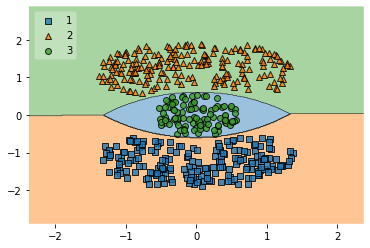

In [118]:
cassini = Classificador()
cassini.carregar('data/cassini500.csv', delimiter=',', ignoraColuna1=True)
cassini.dados
cassini.treinar()
cassini.graficoFronteira()

In [6]:
def validacaoCruzada(dados, porcentagem=0.7):
    random.shuffle(dados)
    dadosTreinamento = dados[:int(len(dados)*porcentagem)]
    dadosTestes = dados[int(len(dados)*porcentagem):]
    modelo = treinamento(dadosTreinamento)
    ok = 0
    for tupla in dadosTestes:
        #print(tupla[-1])
        tupl = [ float(x) for x in tupla[:-1]]
        tupl = tupla[:-1]
        #print(tupl)
        pred = verificar(modelo, tupl, debug=False) 
        #print('pred:',pred,'real:',tupla[-1])
        if pred == tupla[-1]:
            ok += 1
        #print()
    print('Conj Teste:',len(dadosTestes))
    print('Acertos   :',ok)
    print('Acurácia  : ',ok/len(dadosTestes)*100)


# dataset tempo

In [7]:
!wc -l data/tempo.csv

14 data/tempo.csv


In [8]:
tempo = carregar('data/tempo.csv')
len(tempo)

14

In [79]:
tempo = Classificador()
tempo.carregar('data/tempo.csv')
tempo.dados
tempo.treinar()

In [80]:
tempo.modelo

{'no': 0.35714285714285715,
 'sunny': 0.35714285714285715,
 ('sunny', 'no'): 0.4,
 'yes': 0.6428571428571429,
 'overcast': 0.2857142857142857,
 ('overcast', 'yes'): 0.4444444444444444,
 'rainny': 0.35714285714285715,
 ('rainny', 'yes'): 0.2222222222222222,
 ('sunny', 'yes'): 0.3333333333333333,
 ('rainny', 'no'): 0.6,
 'classes': ['yes', 'no']}

In [81]:
tempo.predizer(['sunny'], debug=True)

yes 0.6
no 0.4


'yes'

In [82]:
tempo.predizer(['overcast'], debug=True)

yes 1.0
no 0.00125


'yes'

In [83]:
tempo.predizer(['rainny'], debug=True)

yes 0.39999999999999997
no 0.6


'no'

In [9]:
modeloTempo = treinamento(tempo)

In [10]:
modeloTempo

{'no': 0.35714285714285715,
 'sunny': 0.35714285714285715,
 ('sunny', 'no'): 0.4,
 'yes': 0.6428571428571429,
 'overcast': 0.2857142857142857,
 ('overcast', 'yes'): 0.4444444444444444,
 'rainny': 0.35714285714285715,
 ('rainny', 'yes'): 0.2222222222222222,
 ('sunny', 'yes'): 0.3333333333333333,
 ('rainny', 'no'): 0.6,
 'classes': ['yes', 'no']}

In [11]:
verificar(modeloTempo, ['sunny'], debug=True)

yes 0.6
no 0.4


'yes'

In [12]:
verificar(modeloTempo, ['overcast'], debug=True)

yes 1.0
no 0.00125


'yes'

In [13]:
verificar(modeloTempo, ['rainny'], debug=True)

yes 0.39999999999999997
no 0.6


'no'

# dataset tenis

In [14]:
!wc -l data/tenis.csv

14 data/tenis.csv


In [15]:
tenis = carregar('data/tenis.csv')
tenis

[('sol', 'quente', 'alta', 'falso', 'não'),
 ('sol', 'quente', 'alta', 'verdadeiro', 'não'),
 ('nublado', 'quente', 'alta', 'falso', 'sim'),
 ('chuva', 'agradável', 'alta', 'falso', 'sim'),
 ('chuva', 'fria', 'normal', 'falso', 'sim'),
 ('chuva', 'fria', 'normal', 'verdadeiro', 'não'),
 ('nublado', 'fria', 'normal', 'verdadeiro', 'sim'),
 ('sol', 'agradável', 'alta', 'falso', 'não'),
 ('sol', 'fria', 'normal', 'falso', 'sim'),
 ('chuva', 'agradável', 'normal', 'falso', 'sim'),
 ('sol', 'agradável', 'normal', 'verdadeiro', 'sim'),
 ('nublado', 'agradável', 'alta', 'verdadeiro', 'sim'),
 ('nublado', 'quente', 'normal', 'falso', 'sim'),
 ('chuva', 'agradável', 'alta', 'verdadeiro', 'não')]

In [16]:
len(tenis)

14

In [17]:
modeloTenis = treinamento(tenis)

In [18]:
modeloTenis

{'não': 0.35714285714285715,
 'sol': 0.35714285714285715,
 ('sol', 'não'): 0.6,
 'quente': 0.2857142857142857,
 ('quente', 'não'): 0.4,
 'alta': 0.5,
 ('alta', 'não'): 0.8,
 'falso': 0.5714285714285714,
 ('falso', 'não'): 0.4,
 'verdadeiro': 0.42857142857142855,
 ('verdadeiro', 'não'): 0.6,
 'sim': 0.6428571428571429,
 'nublado': 0.2857142857142857,
 ('nublado', 'sim'): 0.4444444444444444,
 ('quente', 'sim'): 0.2222222222222222,
 ('alta', 'sim'): 0.3333333333333333,
 ('falso', 'sim'): 0.6666666666666666,
 'chuva': 0.35714285714285715,
 ('chuva', 'sim'): 0.3333333333333333,
 'agradável': 0.42857142857142855,
 ('agradável', 'sim'): 0.4444444444444444,
 'fria': 0.2857142857142857,
 ('fria', 'sim'): 0.3333333333333333,
 'normal': 0.5,
 ('normal', 'sim'): 0.6666666666666666,
 ('chuva', 'não'): 0.4,
 ('fria', 'não'): 0.2,
 ('normal', 'não'): 0.2,
 ('verdadeiro', 'sim'): 0.3333333333333333,
 ('agradável', 'não'): 0.4,
 ('sol', 'sim'): 0.2222222222222222,
 'classes': ['não', 'sim']}

In [19]:
tupla = ('sol', 'fria', 'alta', 'verdadeiro')
print(verificar(modeloTenis, tupla, debug=True))

não 0.9408
sim 0.2419753086419753
não


In [20]:
tupla = ('chuva', 'fria', 'normal', 'verdadeiro')
print(verificar(modeloTenis, tupla, debug=True))

não 0.15680000000000005
sim 0.7259259259259259
sim


# tenis2 dataset: atributos continuos

In [21]:
!wc -l data/tenis2.csv

14 data/tenis2.csv


In [22]:
tenis2 = carregar('data/tenis2.csv')
tenis2

[('sol', 85.0, 85.0, 'falso', 'não'),
 ('sol', 80.0, 90.0, 'verdadeiro', 'não'),
 ('nublado', 83.0, 86.0, 'falso', 'sim'),
 ('chuva', 70.0, 96.0, 'falso', 'sim'),
 ('chuva', 68.0, 80.0, 'falso', 'sim'),
 ('chuva', 65.0, 70.0, 'verdadeiro', 'não'),
 ('nublado', 64.0, 65.0, 'verdadeiro', 'sim'),
 ('sol', 72.0, 95.0, 'falso', 'não'),
 ('sol', 69.0, 70.0, 'falso', 'sim'),
 ('chuva', 75.0, 80.0, 'falso', 'sim'),
 ('sol', 75.0, 70.0, 'verdadeiro', 'sim'),
 ('nublado', 72.0, 90.0, 'verdadeiro', 'sim'),
 ('nublado', 81.0, 75.0, 'falso', 'sim'),
 ('chuva', 71.0, 91.0, 'verdadeiro', 'não')]

In [23]:
len(tenis2)

14

In [24]:
modeloTenis2 = treinamento(tenis2)

In [25]:
modeloTenis2

{'não': 0.35714285714285715,
 'sol': 0.35714285714285715,
 ('sol', 'não'): 0.6,
 'i1': {'media': 73.57142857142857, 'desvio': 6.57166745862975},
 ('i1', 'não'): {'media': 74.6, 'desvio': 7.893034904268446},
 'i2': {'media': 81.64285714285714, 'desvio': 10.285218242007035},
 ('i2', 'não'): {'media': 86.2, 'desvio': 9.731392500562292},
 'falso': 0.5714285714285714,
 ('falso', 'não'): 0.4,
 'verdadeiro': 0.42857142857142855,
 ('verdadeiro', 'não'): 0.6,
 'sim': 0.6428571428571429,
 'nublado': 0.2857142857142857,
 ('nublado', 'sim'): 0.4444444444444444,
 ('i1', 'sim'): {'media': 73.0, 'desvio': 6.164414002968976},
 ('i2', 'sim'): {'media': 79.11111111111111, 'desvio': 10.215728613814635},
 ('falso', 'sim'): 0.6666666666666666,
 'chuva': 0.35714285714285715,
 ('chuva', 'sim'): 0.3333333333333333,
 ('chuva', 'não'): 0.4,
 ('verdadeiro', 'sim'): 0.3333333333333333,
 ('sol', 'sim'): 0.2222222222222222,
 'classes': ['não', 'sim']}

In [26]:
tupla = ('sol', 83, 73, 'verdadeiro')
print(verificar(modeloTenis2, tupla, debug=True))

não 0.6661952433370804
sim 0.2984141388375451
não


# dataset iris

In [27]:
!wc -l data/iris/iris.data

149 data/iris/iris.data


In [28]:
!head data/iris/iris.data

5.1,3.5,1.4,0.2,"Iris-setosa"
4.9,3.0,1.4,0.2,"Iris-setosa"
4.7,3.2,1.3,0.2,"Iris-setosa"
4.6,3.1,1.5,0.2,"Iris-setosa"
5.0,3.6,1.4,0.2,"Iris-setosa"
5.4,3.9,1.7,0.4,"Iris-setosa"
4.6,3.4,1.4,0.3,"Iris-setosa"
5.0,3.4,1.5,0.2,"Iris-setosa"
4.4,2.9,1.4,0.2,"Iris-setosa"
4.9,3.1,1.5,0.1,"Iris-setosa"


In [29]:
iris = carregar("data/iris/iris.data", delimiter=',', ignoraLinha1=False)

In [30]:
len(iris)

150

In [32]:
iris[:10]

[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.0, 1.4, 0.2, 'Iris-setosa'),
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (5.0, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.1, 1.5, 0.1, 'Iris-setosa')]

In [33]:
modeloIris = treinamento(iris)

In [34]:
modeloIris

{'Iris-setosa': 0.3333333333333333,
 'i0': {'media': 5.843333333333335, 'desvio': 0.8280661279778629},
 ('i0', 'Iris-setosa'): {'media': 5.005999999999999,
  'desvio': 0.3524896872134512},
 'i1': {'media': 3.0540000000000007, 'desvio': 0.4335943113621737},
 ('i1', 'Iris-setosa'): {'media': 3.4180000000000006,
  'desvio': 0.38102439795469095},
 'i2': {'media': 3.7586666666666693, 'desvio': 1.7644204199522617},
 ('i2', 'Iris-setosa'): {'media': 1.464, 'desvio': 0.1735111594364455},
 'i3': {'media': 1.1986666666666672, 'desvio': 0.7631607417008414},
 ('i3', 'Iris-setosa'): {'media': 0.2439999999999999,
  'desvio': 0.10720950308167837},
 'Iris-versicolor': 0.3333333333333333,
 ('i0', 'Iris-versicolor'): {'media': 5.936, 'desvio': 0.5161711470638635},
 ('i1', 'Iris-versicolor'): {'media': 2.7700000000000005,
  'desvio': 0.3137983233784114},
 ('i2', 'Iris-versicolor'): {'media': 4.26, 'desvio': 0.46991097723995806},
 ('i3', 'Iris-versicolor'): {'media': 1.3259999999999998,
  'desvio': 0.1977

In [35]:
tupla = (4.4, 2.9, 1.4, 0.2)
verificar(modeloIris, tupla, debug=True)

Iris-virginica 4.906984002426971e-23
Iris-versicolor 2.707818334185056e-15
Iris-setosa 140.3852259221931


'Iris-setosa'

In [36]:
validacaoCruzada(iris, 0.7)

Conj Teste: 45
Acertos   : 43
Acurácia  :  95.55555555555556


# dataset iris 2 dimensões

In [37]:
!wc -l data/iris/iris2dim.csv

150 data/iris/iris2dim.csv


In [39]:
!head data/iris/iris2dim.csv

5.1,1.4,0
4.9,1.4,0
4.7,1.3,0
4.6,1.5,0
5.0,1.4,0
5.4,1.7,0
4.6,1.4,0
5.0,1.5,0
4.4,1.4,0
4.9,1.5,0


In [40]:
iris2dim = carregar("data/iris/iris2dim.csv", delimiter=',', ignoraLinha1=False)

In [43]:
len(iris2dim)

150

In [45]:
iris2dim[:10]

[(5.1, 1.4, 0.0),
 (4.9, 1.4, 0.0),
 (4.7, 1.3, 0.0),
 (4.6, 1.5, 0.0),
 (5.0, 1.4, 0.0),
 (5.4, 1.7, 0.0),
 (4.6, 1.4, 0.0),
 (5.0, 1.5, 0.0),
 (4.4, 1.4, 0.0),
 (4.9, 1.5, 0.0)]

In [46]:
modeloIris2dim = treinamento(iris2dim)

In [47]:
verificar(modeloIris2dim, [3.3, 1.0])

0.0

In [48]:
validacaoCruzada(iris2dim, 0.7)

Conj Teste: 45
Acertos   : 37
Acurácia  :  82.22222222222221


In [58]:
from mlxtend.plotting import plot_decision_regions

In [68]:
nb = Classificador()
nb.modelo = modeloIris2dim

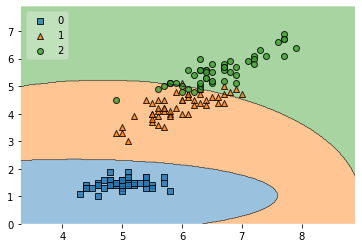

In [69]:
nb.graficoFronteira()

In [51]:
import numpy as np

def graficoFronteiras(dados):
    
    X = np.array([ [float(x[0]),float(x[1])] for x in iris2dim ])
    y = np.array([ int(x[2]) for x in iris2dim ])
    
    #print('X',X)
    #print('y',y)
graficoFronteiras(iris2dim)

X [[7.2 6.1]
 [6.4 5.6]
 [5.7 1.7]
 [5.4 1.3]
 [6.9 5.1]
 [5.5 4.4]
 [7.9 6.4]
 [7.2 6. ]
 [5.9 5.1]
 [6.1 4.9]
 [6.1 4. ]
 [5.1 1.5]
 [7.7 6.1]
 [4.7 1.6]
 [5.1 1.9]
 [4.4 1.4]
 [5.7 4.5]
 [5.5 4. ]
 [4.9 1.5]
 [4.8 1.6]
 [7.7 6.7]
 [4.4 1.3]
 [6.7 4.7]
 [6.6 4.6]
 [6.9 5.7]
 [6.3 4.9]
 [5.9 4.2]
 [5.5 1.4]
 [5.  1.6]
 [5.1 1.6]
 [5.4 1.5]
 [5.  1.4]
 [5.8 1.2]
 [5.1 1.4]
 [5.8 5.1]
 [5.4 1.7]
 [6.5 5.1]
 [6.7 5. ]
 [6.4 4.5]
 [4.9 1.4]
 [6.  5.1]
 [5.5 3.7]
 [5.  1.3]
 [5.4 1.7]
 [7.4 6.1]
 [7.7 6.9]
 [6.3 5.6]
 [4.3 1.1]
 [6.4 4.3]
 [6.3 6. ]
 [6.2 4.8]
 [6.5 5.8]
 [5.2 1.5]
 [6.8 5.9]
 [5.2 3.9]
 [5.8 4. ]
 [4.6 1.4]
 [6.5 5.2]
 [6.7 5.8]
 [5.7 1.5]
 [4.4 1.3]
 [6.3 5. ]
 [5.8 4.1]
 [5.9 4.8]
 [6.  4.5]
 [6.3 4.9]
 [6.  4. ]
 [6.1 4.7]
 [4.8 1.6]
 [7.6 6.6]
 [5.  3.3]
 [5.4 1.5]
 [5.  3.5]
 [6.3 5.1]
 [7.3 6.3]
 [4.6 1.5]
 [5.7 4.2]
 [4.7 1.3]
 [6.2 5.4]
 [5.5 3.8]
 [5.8 5.1]
 [4.6 1.4]
 [4.9 1.5]
 [5.5 1.3]
 [4.8 1.4]
 [5.2 1.4]
 [6.8 5.5]
 [5.1 3. ]
 [5.7 4.1]
 [6.1 5.6]
 [6.2 4.

In [59]:
class Object(object):
    modelo = None
    
    def predict(self, tupla):
        res = []
        for t in tupla:
            res.append(int(verificar(self.modelo, t)))
        return(np.array(res))
    pass
nb = Object()
modeloIris2dim = treinamento(iris2dim)
nb.modelo = modeloIris2dim

In [305]:
res01 = nb.predict([[3.3 ,       1.0        ],
 [3.31299304, 1.        ],
 [3.32598608, 1.        ]])
type(res01)

numpy.ndarray

In [283]:
res = svm.predict([[3.3 ,       1.0        ],
 [3.31299304, 1.        ],
 [3.32598608, 1.        ]])

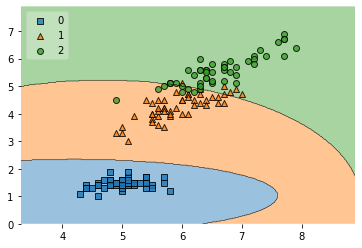

In [329]:
plot_decision_regions(X1, y1, clf=nb, legend=2)
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
#plt.title('NB on Iris')
plt.show()

In [309]:
iris2dim

[('5.1', '1.4', '0'),
 ('4.9', '1.4', '0'),
 ('4.7', '1.3', '0'),
 ('4.6', '1.5', '0'),
 ('5.0', '1.4', '0'),
 ('5.4', '1.7', '0'),
 ('4.6', '1.4', '0'),
 ('5.0', '1.5', '0'),
 ('4.4', '1.4', '0'),
 ('4.9', '1.5', '0'),
 ('5.4', '1.5', '0'),
 ('4.8', '1.6', '0'),
 ('4.8', '1.4', '0'),
 ('4.3', '1.1', '0'),
 ('5.8', '1.2', '0'),
 ('5.7', '1.5', '0'),
 ('5.4', '1.3', '0'),
 ('5.1', '1.4', '0'),
 ('5.7', '1.7', '0'),
 ('5.1', '1.5', '0'),
 ('5.4', '1.7', '0'),
 ('5.1', '1.5', '0'),
 ('4.6', '1.0', '0'),
 ('5.1', '1.7', '0'),
 ('4.8', '1.9', '0'),
 ('5.0', '1.6', '0'),
 ('5.0', '1.6', '0'),
 ('5.2', '1.5', '0'),
 ('5.2', '1.4', '0'),
 ('4.7', '1.6', '0'),
 ('4.8', '1.6', '0'),
 ('5.4', '1.5', '0'),
 ('5.2', '1.5', '0'),
 ('5.5', '1.4', '0'),
 ('4.9', '1.5', '0'),
 ('5.0', '1.2', '0'),
 ('5.5', '1.3', '0'),
 ('4.9', '1.5', '0'),
 ('4.4', '1.3', '0'),
 ('5.1', '1.5', '0'),
 ('5.0', '1.3', '0'),
 ('4.5', '1.3', '0'),
 ('4.4', '1.3', '0'),
 ('5.0', '1.6', '0'),
 ('5.1', '1.9', '0'),
 ('4.8', '

In [284]:
type(res)

numpy.ndarray

In [184]:
nb.modelo = modeloIris
tupla = ('6.7', '3.3', '5.7', '2.5')
nb.predict(tupla)

'Iris-virginica'

In [322]:
X1 = np.array([ [float(x[0]),float(x[1])] for x in iris2dim ])
y1 = np.array([ int(x[2]) for x in iris2dim ])

In [323]:
X1

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [324]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [307]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [308]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [201]:
svm.predict([[3.3 ,       1.0        ],
 [3.31299304, 1.        ],
 [3.32598608, 1.        ]])

array([0, 0, 0])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


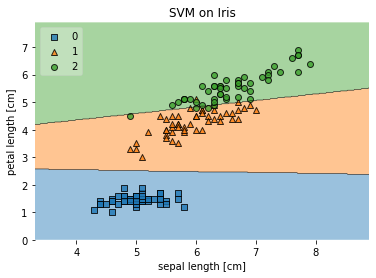

In [160]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris2 = datasets.load_iris()
X = iris2.data[:, [0, 2]]
y = iris2.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [142]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target


In [144]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [123]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))



Number of mislabeled points out of a total 75 points : 4


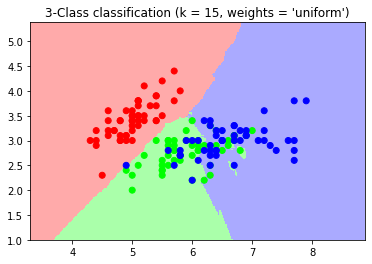

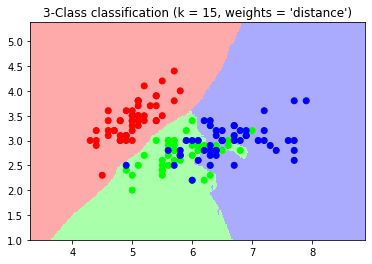

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris2 = datasets.load_iris()
X = iris2.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris2.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Cassini Dataset

In [330]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.cassini(500), 'data/cassini500.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.cassini(500), 'data/cassini500.csv')
> 
> 


In [333]:
!head data/cassini500.csv

"","x.1","x.2","classes"
"1",-0.138816425326661,-1.57714330665767,"1"
"2",0.607304521645446,-0.944022665172815,"1"
"3",0.902953229415305,-1.46385937258601,"1"
"4",0.772474316316862,-1.44147698171437,"1"
"5",-0.55807950490081,-1.58027114123106,"1"
"6",0.892488738218637,-1.5879832804203,"1"
"7",-1.2931302092821,-0.831876108422875,"1"
"8",-0.37533259053603,-1.46394060440362,"1"
"9",0.867808011428578,-1.27059731073678,"1"


In [87]:
!wc -l data/cassini500.csv

501 data/cassini500.csv


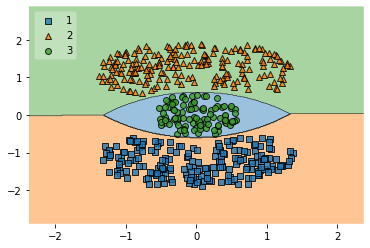

In [119]:
cassini = Classificador()
cassini.carregar('data/cassini500.csv', delimiter=',', ignoraColuna1=True)
cassini.dados
cassini.treinar()
cassini.graficoFronteira()

In [106]:
len(cassini.dados)

500

KeyError: -2.3757093373591998

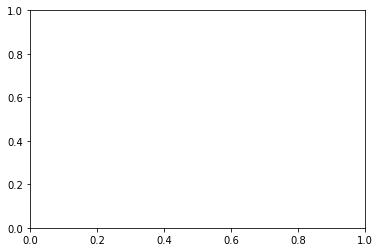

In [107]:
cassini.graficoFronteira()

In [100]:
cassini.dados

[(-0.138816425326661, -1.57714330665767, '1'),
 (0.607304521645446, -0.944022665172815, '1'),
 (0.902953229415305, -1.46385937258601, '1'),
 (0.772474316316862, -1.44147698171437, '1'),
 (-0.55807950490081, -1.58027114123106, '1'),
 (0.892488738218637, -1.5879832804203, '1'),
 (-1.2931302092821, -0.831876108422875, '1'),
 (-0.37533259053603, -1.46394060440362, '1'),
 (0.867808011428578, -1.27059731073678, '1'),
 (-0.389600563916812, -1.1817204400897, '1'),
 (0.261913578847452, -1.09905673265457, '1'),
 (-0.762425970767612, -1.35320575796068, '1'),
 (0.332797961065063, -0.955842364579439, '1'),
 (1.04870653396271, -0.637509609386325, '1'),
 (-0.717199362283278, -1.71302444376051, '1'),
 (0.366440309565887, -1.35327329076827, '1'),
 (0.728158836146804, -1.38614354506135, '1'),
 (1.03815581009292, -0.726706255227327, '1'),
 (-0.866654045528387, -1.20148813761771, '1'),
 (0.317051835900193, -1.25477874130011, '1'),
 (0.0790315244815503, -1.89528398215771, '1'),
 (-0.371483551774018, -1.419

In [395]:
cassini = carregar("data/cassini500.csv", delimiter=',', ignoraColuna1=True)

In [396]:
cassini[:10]

[(-0.138816425326661, -1.57714330665767, '1'),
 (0.607304521645446, -0.944022665172815, '1'),
 (0.902953229415305, -1.46385937258601, '1'),
 (0.772474316316862, -1.44147698171437, '1'),
 (-0.55807950490081, -1.58027114123106, '1'),
 (0.892488738218637, -1.5879832804203, '1'),
 (-1.2931302092821, -0.831876108422875, '1'),
 (-0.37533259053603, -1.46394060440362, '1'),
 (0.867808011428578, -1.27059731073678, '1'),
 (-0.389600563916812, -1.1817204400897, '1')]

In [355]:
modeloCassini = treinamento(cassini)

In [356]:
modeloCassini

{'1': 0.4,
 'i0': {'media': -0.04248781483025525, 'desvio': 0.6918221040135546},
 ('i0', '1'): {'media': 0.023673169333853786, 'desvio': 0.7391030950897297},
 'i1': {'media': 0.012027210412174758, 'desvio': 1.1865447489405332},
 ('i1', '1'): {'media': -1.2570012770202013, 'desvio': 0.33796861105982445},
 '2': 0.4,
 ('i0', '2'): {'media': -0.12960975198859756, 'desvio': 0.769873711145258},
 ('i1', '2'): {'media': 1.2917943302560593, 'desvio': 0.3365271653297808},
 '3': 0.2,
 ('i0', '3'): {'media': -0.0005659088417887814, 'desvio': 0.3114683936600313},
 ('i1', '3'): {'media': -0.00945005441084504, 'desvio': 0.27662428663311583},
 'classes': ['2', '1', '3']}

In [363]:
validacaoCruzada(cassini, 0.5)

Conj Teste: 250
Acertos   : 250
Acurácia  :  100.0


In [338]:
cassini[1][1:]

('2', '0.607304521645446', '-0.944022665172815', '1')

# mlbench.circle

In [122]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.circle(200), 'data/circle200.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.circle(200), 'data/circle200.csv')
> 
> 


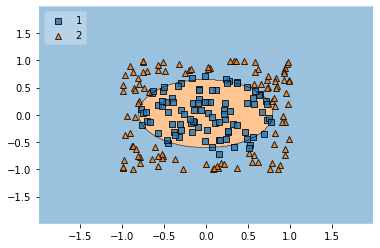

In [123]:
circle = Classificador()
circle.carregar('data/circle200.csv', delimiter=',', ignoraColuna1=True)
circle.dados
circle.treinar()
circle.graficoFronteira()

# mlbench.cuboids

In [125]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.cuboids(500), 'data/cuboids500.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.cuboids(500), 'data/cuboids500.csv')
> 
> 


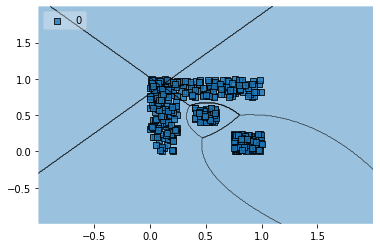

In [126]:
cuboids = Classificador()
cuboids.carregar('data/cuboids500.csv', delimiter=',', ignoraColuna1=True)
cuboids.dados
cuboids.treinar()
cuboids.graficoFronteira()

In [129]:
cuboids.dados[:-3]

[(0.229683245765045, 0.962349051726051, 0.927181890234351, '1'),
 (0.66130540962331, 0.79144231491955, 0.819328139885329, '1'),
 (0.0272114621475339, 0.897799979080446, 0.754162001423538, '1'),
 (0.887245807796717, 0.930003194429446, 0.894655832904391, '1'),
 (0.756993093993515, 0.804737036523875, 0.941156921966467, '1'),
 (0.576005415525287, 0.758058183069807, 0.753771101881284, '1'),
 (0.317044300725684, 0.897349508595653, 0.905388202692848, '1'),
 (0.292553114239126, 0.943796045787167, 0.971506314934231, '1'),
 (0.997318101348355, 0.815396986959968, 0.970138225180563, '1'),
 (0.294488643994555, 0.909550016047433, 0.919709065638017, '1'),
 (0.0973967718891799, 0.789181912143249, 0.813869287725538, '1'),
 (0.584016623208299, 0.982582194206771, 0.847544018935878, '1'),
 (0.628264031140134, 0.887350491131656, 0.778447108867113, '1'),
 (0.381697785342112, 0.881002078123856, 0.912589401123114, '1'),
 (0.36870269710198, 0.925872165767942, 0.949802657938562, '1'),
 (0.763057413045317, 0.992

In [ ]:
mlbench.hypercube

In [131]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.hypercube(500), 'data/hypercube.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.hypercube(500), 'data/hypercube.csv')
> 
> 


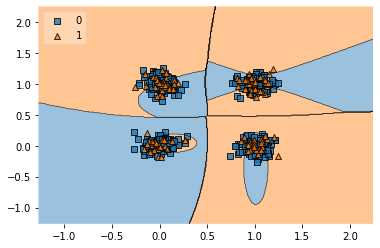

In [132]:
clf = Classificador()
clf.carregar('data/hypercube.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.ringnorm

In [133]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.ringnorm(500), 'data/ringnorm.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.ringnorm(500), 'data/ringnorm.csv')
> 
> 


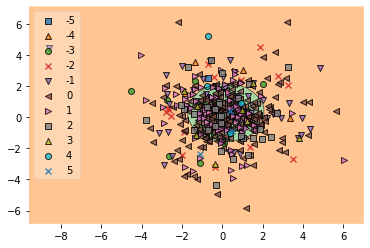

In [134]:
clf = Classificador()
clf.carregar('data/ringnorm.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.shapes

In [135]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.shapes(500), 'data/shapes.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.shapes(500), 'data/shapes.csv')
> 
> 


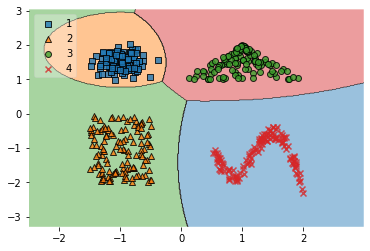

In [136]:
clf = Classificador()
clf.carregar('data/shapes.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.simplex

In [138]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.simplex(500), 'data/simplex.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.simplex(500), 'data/simplex.csv')
> 
> 


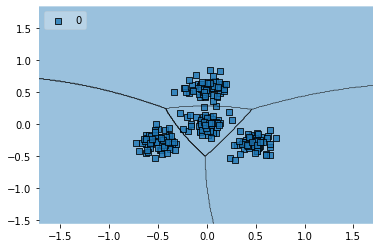

In [139]:
clf = Classificador()
clf.carregar('data/simplex.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.smiley

In [140]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.smiley(500), 'data/smiley.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.smiley(500), 'data/smiley.csv')
> 
> 


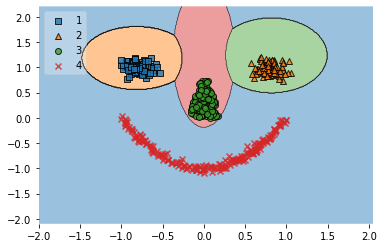

In [141]:
clf = Classificador()
clf.carregar('data/smiley.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

In [ ]:
mlbench.spirals

In [142]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.spirals(500), 'data/spirals.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.spirals(500), 'data/spirals.csv')
> 
> 


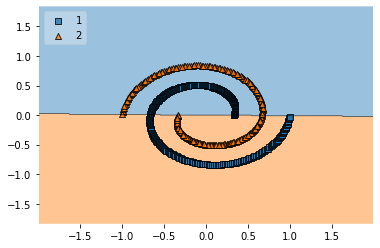

In [143]:
clf = Classificador()
clf.carregar('data/spirals.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.spirals

In [146]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.spirals(1000), 'data/spirals1k.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.spirals(1000), 'data/spirals1k.csv')
> 
> 


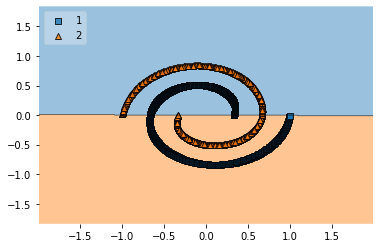

In [147]:
clf = Classificador()
clf.carregar('data/spirals1k.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.threenorm

In [148]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.threenorm(500), 'data/threenorm.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.threenorm(500), 'data/threenorm.csv')
> 
> 


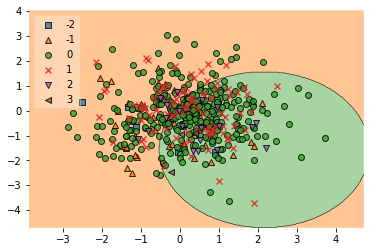

In [149]:
clf = Classificador()
clf.carregar('data/threenorm.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.twonorm

In [150]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.twonorm(500), 'data/twonorm.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.twonorm(500), 'data/twonorm.csv')
> 
> 


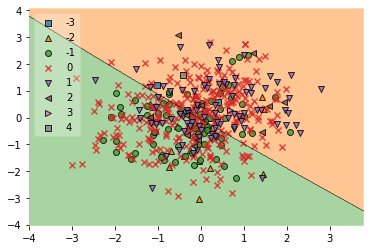

In [151]:
clf = Classificador()
clf.carregar('data/twonorm.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.waveform

In [152]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.waveform(500), 'data/waveform.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.waveform(500), 'data/waveform.csv')
> 
> 


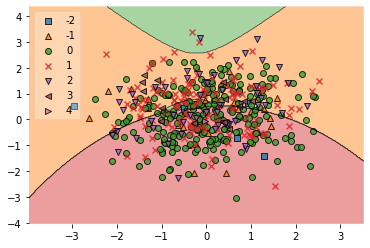

In [153]:
clf = Classificador()
clf.carregar('data/waveform.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.xor d=2

In [154]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.xor(500, d=2), 'data/xor2d.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.xor(500, d=2), 'data/xor2d.csv')
> 
> 


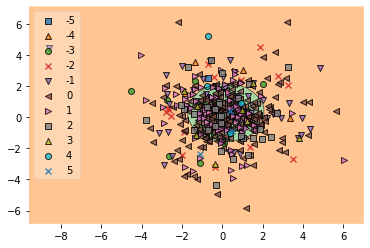

In [155]:
clf = Classificador()
clf.carregar('data/ringnorm.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()

# mlbench.xor d=3

In [156]:
# baixando dataset do R
!R -e "library(mlbench); write.csv(mlbench.xor(500,d=3), 'data/xor3d.csv')"


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R é um software livre e vem sem GARANTIA ALGUMA.
Você pode redistribuí-lo sob certas circunstâncias.
Digite 'license()' ou 'licence()' para detalhes de distribuição.

R é um projeto colaborativo com muitos contribuidores.
Digite 'contributors()' para obter mais informações e
'citation()' para saber como citar o R ou pacotes do R em publicações.

Digite 'demo()' para demonstrações, 'help()' para o sistema on-line de ajuda,
ou 'help.start()' para abrir o sistema de ajuda em HTML no seu navegador.
Digite 'q()' para sair do R.

> library(mlbench); write.csv(mlbench.xor(500,d=3), 'data/xor3d.csv')
> 
> 


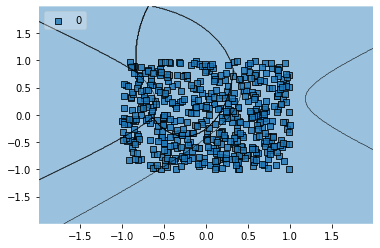

In [157]:
clf = Classificador()
clf.carregar('data/xor3d.csv', delimiter=',', ignoraColuna1=True)
clf.dados
clf.treinar()
clf.graficoFronteira()